In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [14]:
cpdata = pd.read_csv('app2_data_17_04_py.csv')

In [15]:
cpdata.head(10)
#cpdata.info()

,devEUI,rssi,loraSNR,frequency,dr,fCnt,fPort,data,datetime,location
0,0004a30b001febcf,-34,10.5,868500000,0,1,1,F15D1,2019-04-24 00:06:22.797545,appartment
1,0004a30b001febcf,-33,9.5,868100000,0,2,1,F15D2,2019-04-24 00:06:29.367199,appartment
2,0004a30b001febcf,-48,9.5,868500000,5,3,1,F15D3,2019-04-24 00:06:34.832719,appartment
3,0004a30b001febcf,-46,10.0,868300000,5,4,1,F15D4,2019-04-24 00:06:38.953667,appartment
4,0004a30b001febcf,-48,9.8,868100000,5,5,1,F15D5,2019-04-24 00:06:43.123873,appartment
5,0004a30b001febcf,-49,9.3,868500000,5,6,1,F15D6,2019-04-24 00:06:47.279326,appartment
6,0004a30b001febcf,-48,9.3,868500000,5,7,1,F15D7,2019-04-24 00:06:51.409365,appartment
7,0004a30b001febcf,-46,9.5,868100000,5,8,1,F15D8,2019-04-24 00:06:59.879406,appartment
8,0004a30b001febcf,-41,10.3,868100000,4,9,1,F15D9,2019-04-24 00:07:04.062056,appartment
9,0004a30b001febcf,-42,8.8,868300000,5,10,1,F15D10,2019-04-24 00:07:08.265786,appartment


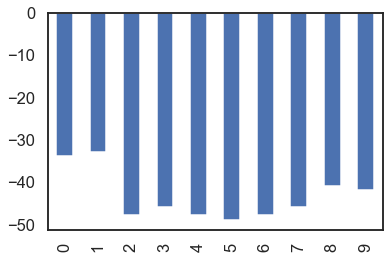

In [16]:
cpdata['rssi'].head(10).plot.bar()

In [17]:
f15 = cpdata[cpdata["data"].str.match('F15')]
#df[df['model'].str.match('Mac')]
f14 = cpdata[cpdata["data"].str.match('F14')]

In [18]:
f15['rssi'].mean()

-45.8

In [19]:
f14['rssi'].mean()

-101.04761904761905

## Average RSSI and SNR at Each Floor

In [20]:
f_rssi_mean = []
f_snr_mean = []
for val in range(16):
    if(val < 10):
        key = "F0" + str(val)
        temp = cpdata[cpdata["data"].str.match(key)]
        f_rssi_mean.append({key : temp['rssi'].mean()})
        f_snr_mean.append({key : temp['loraSNR'].mean()})
    else:
        key = "F" + str(val)
        temp = cpdata[cpdata["data"].str.match(key)]
        f_rssi_mean.append({key : temp['rssi'].mean()})
        f_snr_mean.append({key : temp['loraSNR'].mean()})

In [34]:
f_rssi_mean
x = np.array(list(map(lambda  x: list(x.keys())[0], f_rssi_mean)))
print(x)

['F00' 'F01' 'F02' 'F03' 'F04' 'F05' 'F06' 'F07' 'F08' 'F09' 'F10' 'F11'
 'F12' 'F13' 'F14' 'F15']


Text(0, 0.5, 'SNR')

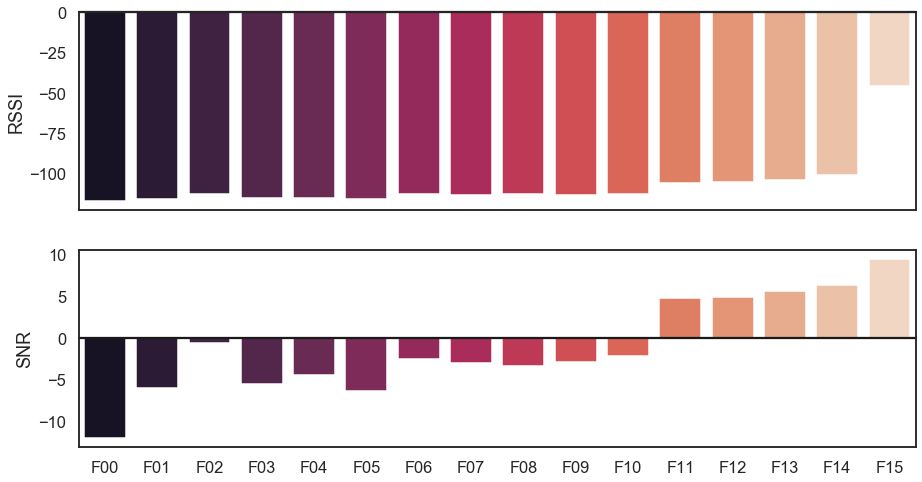

In [43]:
sns.set(style="white", context="talk")

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# RSSI
x = np.array(list(map(lambda  x: list(x.keys())[0], f_rssi_mean)))
y1 = np.array(list(map(lambda  x: list(x.values())[0], f_rssi_mean)))
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("RSSI")

# SNR
x_snr = np.array(list(map(lambda  x: list(x.keys())[0], f_snr_mean)))
y1_snr = np.array(list(map(lambda  x: list(x.values())[0], f_snr_mean)))
sns.barplot(x=x_snr, y=y1_snr, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("SNR")

In [22]:
f_snr_mean

[{'F00': -12.095238095238098},
 {'F01': -6.054999999999999},
 {'F02': -0.6449999999999999},
 {'F03': -5.545},
 {'F04': -4.531818181818181},
 {'F05': -6.394999999999999},
 {'F06': -2.5952380952380945},
 {'F07': -2.9799999999999995},
 {'F08': -3.3947368421052633},
 {'F09': -2.9449999999999994},
 {'F10': -2.180952380952381},
 {'F11': 4.838095238095237},
 {'F12': 4.879999999999999},
 {'F13': 5.5699999999999985},
 {'F14': 6.371428571428571},
 {'F15': 9.515}]

## To find time taken at each floor¶


In [11]:
import datetime as dt

#reviews[reviews['price'] < 200]['price'].plot.hist()

start = cpdata[cpdata["data"] == 'F15D1']
end = cpdata[cpdata["data"] == 'F15D20']

print(start['datetime'])
print(end['datetime'])

#data["Salary"]= data["Salary"].astype(int) 

start_time = start.values.tolist()
end_time = end.values.tolist()


print(end_time[0][8])

# date format 2019-04-24 00:06:22.797545
a = dt.datetime.strptime(start_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
b = dt.datetime.strptime(end_time[0][8], '%Y-%m-%d %H:%M:%S.%f')

(b-a).total_seconds()

0    2019-04-24 00:06:22.797545
Name: datetime, dtype: object
19    2019-04-24 00:07:49.788144
Name: datetime, dtype: object
2019-04-24 00:07:49.788144


86.990599

In [12]:
f_total_floor = []
f_total_time = []
for val in range(16):
    if(val < 10):
        key = "F0" + str(val)
        start = cpdata[cpdata["data"] == key + 'D1']
        end = cpdata[cpdata["data"] == key + 'D20']
        start_time = start.values.tolist()
        end_time = end.values.tolist()
        a = dt.datetime.strptime(start_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        b = dt.datetime.strptime(end_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        f_total_floor.append(key)
        f_total_time.append((b-a).total_seconds())
    else:
        key = "F" + str(val)
        start = cpdata[cpdata["data"] == key + 'D1']
        end = cpdata[cpdata["data"] == key + 'D20']
        start_time = start.values.tolist()
        end_time = end.values.tolist()
        a = dt.datetime.strptime(start_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        b = dt.datetime.strptime(end_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        f_total_floor.append(key)
        f_total_time.append((b-a).total_seconds())

In [13]:
f_total_time

[99.04509,
 118.52898,
 131.869865,
 113.584416,
 135.762109,
 162.100152,
 176.065031,
 138.274353,
 188.957198,
 95.666096,
 95.779891,
 91.291378,
 86.987915,
 95.726662,
 91.201314,
 86.990599]

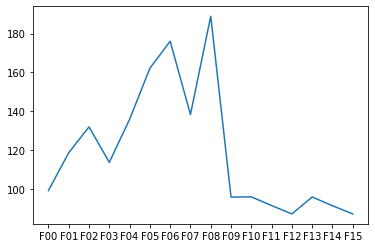

In [14]:
x = f_total_floor
y = f_total_time
plt.plot(x, y)
plt.show()

In [15]:
a_total_floor = []
a_total_time = []
for val in range(16):
    if(val < 10):
        key = "A0" + str(val)
        start = cpdata[cpdata["data"] == key + 'D1']
        end = cpdata[cpdata["data"] == key + 'D20']
        start_time = start.values.tolist()
        end_time = end.values.tolist()
        a = dt.datetime.strptime(start_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        b = dt.datetime.strptime(end_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        a_total_floor.append(key)
        a_total_time.append((b-a).total_seconds())
    else:
        key = "A" + str(val)
        start = cpdata[cpdata["data"] == key + 'D1']
        end = cpdata[cpdata["data"] == key + 'D20']
        start_time = start.values.tolist()
        end_time = end.values.tolist()
        a = dt.datetime.strptime(start_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        b = dt.datetime.strptime(end_time[0][8], '%Y-%m-%d %H:%M:%S.%f')
        a_total_floor.append(key)
        a_total_time.append((b-a).total_seconds())

In [16]:
a_total_time

[182.362387,
 165.247883,
 171.299749,
 154.129476,
 229.364734,
 106.397644,
 130.832246,
 126.697138,
 114.605248,
 106.379904,
 116.322666,
 161.089988,
 164.004032,
 173.332019,
 117.955298,
 122.938001]

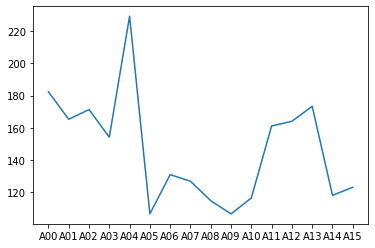

In [17]:
x = a_total_floor
y = a_total_time
plt.plot(x, y)
plt.show()

In [18]:
f_total_floor.reverse()
f_total_time.reverse()

In [19]:
f_total_floor

['F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F09',
 'F08',
 'F07',
 'F06',
 'F05',
 'F04',
 'F03',
 'F02',
 'F01',
 'F00']

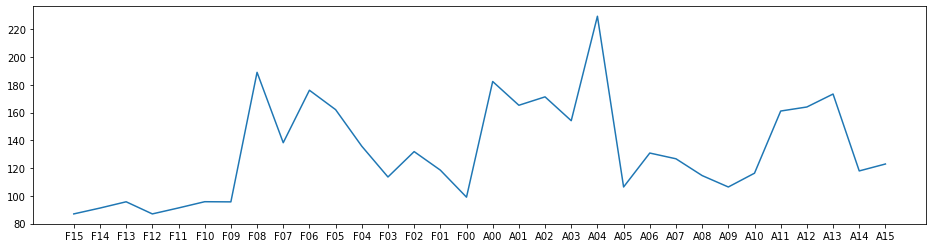

In [20]:
# Both the Floors

x = f_total_floor + a_total_floor 
y = f_total_time + a_total_time
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x, y)
plt.show()

In [21]:
# Default
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [37]:
cpdata.head(10)

,devEUI,rssi,loraSNR,frequency,dr,fCnt,fPort,data,datetime,location,floor
0,0004a30b001febcf,-34,10.5,868500000,0,1,1,F15D1,2019-04-24 00:06:22.797545,appartment,F15
1,0004a30b001febcf,-33,9.5,868100000,0,2,1,F15D2,2019-04-24 00:06:29.367199,appartment,F15
2,0004a30b001febcf,-48,9.5,868500000,5,3,1,F15D3,2019-04-24 00:06:34.832719,appartment,F15
3,0004a30b001febcf,-46,10.0,868300000,5,4,1,F15D4,2019-04-24 00:06:38.953667,appartment,F15
4,0004a30b001febcf,-48,9.8,868100000,5,5,1,F15D5,2019-04-24 00:06:43.123873,appartment,F15
5,0004a30b001febcf,-49,9.3,868500000,5,6,1,F15D6,2019-04-24 00:06:47.279326,appartment,F15
6,0004a30b001febcf,-48,9.3,868500000,5,7,1,F15D7,2019-04-24 00:06:51.409365,appartment,F15
7,0004a30b001febcf,-46,9.5,868100000,5,8,1,F15D8,2019-04-24 00:06:59.879406,appartment,F15
8,0004a30b001febcf,-41,10.3,868100000,4,9,1,F15D9,2019-04-24 00:07:04.062056,appartment,F15
9,0004a30b001febcf,-42,8.8,868300000,5,10,1,F15D10,2019-04-24 00:07:08.265786,appartment,F15


In [25]:
cpdata['data'].describe()

count        658
unique       632
top       A04D18
freq           3
Name: data, dtype: object

In [36]:
cpdata['floor']=cpdata['data'].str.split('D').str[0]


In [38]:
cpdata['floor'].describe()

count     658
unique     34
top       A04
freq       23
Name: floor, dtype: object

In [41]:
cpdata['floor'].value_counts()

A04     23
A01     23
F04     22
A15     22
F11     21
F10     21
A14     21
A08     21
F14     21
A13     21
A00     21
F06     21
F00     21
A02     20
A09     20
F03     20
F13     20
F12     20
A03     20
A10     20
F09     20
F15     20
F05     20
A06     20
F02     20
F07     20
A07     20
A05     20
F01     20
F08     19
A11     19
A12     19
F45      1
ping     1
Name: floor, dtype: int64

## Interpacler Delay

Inter packet delay can be calculated using total time in a floor/No. of packet received